In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import DataLoader

In [3]:
from keras.utils import to_categorical

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

In [6]:
# file_loc='../../ADNI_data/future_dx_prediction_alz_plos/'
# # df_all = pd.read_csv('step5_modified_mri_alz_future_prediction_plos.csv')
# # df_all = pd.read_csv('step5_modified_all_mri_alz_future_prediction_plos.csv')
# df_all = pd.read_csv(file_loc + 'step5_modified_all_mri_imageidna_drop_alz_future_prediction_plos.csv')

In [7]:
file_loc='../../ADNI_data/future_dx_prediction_alz_plos/'
# df_all = pd.read_csv('step5_modified_mri_alz_future_prediction_plos.csv')
df_all_step3 = pd.read_csv(file_loc + 'df_step3_addedmri_dep_fl.csv')
df_all_raw = pd.read_csv(file_loc + 'step5_modified_all_mri_imageidna_drop_alz_future_prediction_plos.csv')
df_all_absvol = pd.read_csv(file_loc + 'df_all_mri_absvol_ploscomp.csv')

df_all_raw.shape,df_all_absvol.shape,df_all_step3.shape

((3390, 32), (3390, 38), (1419, 98))

In [8]:
df_all_step3.columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'Years_bl', 'Month_bl', 'Month',
       'M', 'update_stamp', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT',
       'PTRACCAT', 'PTMARRY', 'APOE4', 'CDRSB', 'FAQ', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
       'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'MOCA', 'mPACCdigit',
       'mPACCtrailsB', 'ABETA', 'TAU', 'PTAU', 'FDG', 'PIB', 'AV45',
       'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform',
       'MidTemp', 'ICV', 'DX', 'FMonth_0', 'FMonth_1', 'FMonth_2', 'FMonth_3',
       'FMonth_4', 'FMonth_5', 'FDX_0', 'FDX_1', 'FDX_2', 'FDX_3',

In [9]:
df_all_absvol.columns

Index(['RID', 'Yr_visit', 'DX', 'FollowupYear', 'FollowupDX', 'IMAGEUID',
       'RightEntorhinal', 'RightTemporalPole', 'RightParahippocampal',
       'RightInferiorTemporal', 'RightMiddleTemporal', 'RightFusiform',
       'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
       'RightPrecuneus', 'RightHippocampus', 'RightAmygdala',
       'RightAccumbensArea', 'RightMedialOrbitofrontal', 'RightPallidum',
       'RightCaudalMiddleFrontal', 'RightPutamen',
       'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral',
       'RightLingual', 'LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform',
       'LeftMiddleTemporal', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV'],
      dtype='object')

In [10]:
df_pre_result = pd.read_csv('df_CNvsMCI_mri_all_absvol_RID_separate_random_forest.csv')
rdseed_pre_list = df_pre_result['rdseed_list'].tolist()
# rdseed_pre_list = [4781, 595, 8440, 7931, 1045, 1968, 5143, 6628, 6109, 7361]
# df_pre_result['rdseed_list']
rdseed_pre_list[0:5]

[2792, 6701, 2764, 9009, 1642]

In [11]:
# df_all=df_all_raw.copy()
# df_all=df_all_absvol.copy()

In [12]:
df_all_raw.columns

Index(['RID', 'Yr_visit', 'GDTOTAL', 'IMAGEUID', 'RightTemporalPole',
       'RightParahippocampal', 'RightInferiorTemporal',
       'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
       'RightPrecuneus', 'RightAmygdala', 'RightAccumbensArea',
       'RightMedialOrbitofrontal', 'RightPallidum', 'RightCaudalMiddleFrontal',
       'RightPutamen', 'RightRostralAnteriorCingulate', 'RightParacentral',
       'RightPrecentral', 'RightLingual', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX',
       'FollowupYear', 'FollowupDX', 'TrainValTest'],
      dtype='object')

In [13]:
df_all_absvol.columns

Index(['RID', 'Yr_visit', 'DX', 'FollowupYear', 'FollowupDX', 'IMAGEUID',
       'RightEntorhinal', 'RightTemporalPole', 'RightParahippocampal',
       'RightInferiorTemporal', 'RightMiddleTemporal', 'RightFusiform',
       'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
       'RightPrecuneus', 'RightHippocampus', 'RightAmygdala',
       'RightAccumbensArea', 'RightMedialOrbitofrontal', 'RightPallidum',
       'RightCaudalMiddleFrontal', 'RightPutamen',
       'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral',
       'RightLingual', 'LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform',
       'LeftMiddleTemporal', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV'],
      dtype='object')

In [14]:
df_all = df_all_absvol.merge(df_all_step3[['RID','AGE','PTEDUCAT','GDTOTAL']])

In [15]:
df_all['GDTOTAL'].count(),df_all['PTEDUCAT'].count(),df_all['AGE'].count()

(3372, 3381, 3381)

In [16]:
# df_all['GDTOTAL'].value_counts()

In [17]:
df_all['GDTOTAL'] = df_all['GDTOTAL'].fillna(df_all['GDTOTAL'].mode())

In [18]:
df_all['GDTOTAL'].count(),df_all['PTEDUCAT'].count(),df_all['AGE'].count()

(3372, 3381, 3381)

In [19]:
# df_all['MMSE_norm'] = (df_all['MMSE']-df_all['MMSE'].mean())/df_all['MMSE'].std()
df_all['GDTOTAL_norm'] = (df_all['GDTOTAL']-df_all['GDTOTAL'].mean())/df_all['GDTOTAL'].std()
df_all['age_norm'] = (df_all['AGE']-df_all['AGE'].mean())/df_all['AGE'].std()
df_all['PTEDUCAT_norm'] = (df_all['PTEDUCAT']-df_all['PTEDUCAT'].mean())/df_all['PTEDUCAT'].std()
df_all.shape

(3381, 44)

In [20]:
# df_all['GDTOTAL'].describe()

In [21]:
# # Initializing Input vector 
# class_vector =[2, 5, 6, 1, 4, 2, 3, 2] 
# print(class_vector) 
  
# # Applying the function on input class vector 
# from keras.utils import to_categorical 
# output_matrix = to_categorical(class_vector, num_classes = 7, dtype ="int32") 
  
# print(output_matrix) 

In [22]:
df_all_step3['APOE4'].value_counts()

0.0    805
1.0    476
2.0    112
Name: APOE4, dtype: int64

In [23]:
df_all_step3[['RID','APOE4']].dropna().shape

(1393, 2)

In [24]:
df_apoe4=pd.concat([df_all_step3[['RID','APOE4']].dropna().reset_index(drop=True),pd.DataFrame(to_categorical(df_all_step3['APOE4'].dropna().tolist(), num_classes = 3, dtype ="int32"))],axis=1)

In [25]:
df_apoe4.rename(columns={0:'apoe4_0',1:'apoe4_1',2:'apoe4_2'}, inplace = True)

In [26]:
df_apoe4.head(2)

,RID,APOE4,apoe4_0,apoe4_1,apoe4_2
0,4,0.0,1,0,0
1,5,0.0,1,0,0


In [27]:
df_all = df_all.merge(df_apoe4[['RID','apoe4_0','apoe4_1','apoe4_2']])
df_all.shape

(3381, 47)

In [28]:
# pd.DataFrame(to_categorical(df_all_step3['APOE4'].dropna().tolist(), num_classes = 3, dtype ="int32"))

In [29]:
df_all.head()

,RID,Yr_visit,DX,FollowupYear,FollowupDX,IMAGEUID,RightEntorhinal,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,...,ICV,AGE,PTEDUCAT,GDTOTAL,GDTOTAL_norm,age_norm,PTEDUCAT_norm,apoe4_0,apoe4_1,apoe4_2
0,5,0,CN,3,CN,32246,2525.0,1999.0,2305.0,9870.0,...,1640770.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
1,5,1,CN,3,CN,31906,2009.0,1843.0,2037.0,10008.0,...,1631430.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
2,5,2,CN,3,CN,200385,2731.0,1950.0,2088.0,10405.0,...,1634180.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
3,14,0,CN,3,CN,59375,1786.0,1279.0,1621.0,8240.0,...,1269540.0,78.5,12,0.0,-0.951953,0.710720,-1.464905,1,0,0
4,14,1,CN,3,CN,59391,1830.0,1378.0,1414.0,8849.0,...,1264890.0,78.5,12,0.0,-0.951953,0.710720,-1.464905,1,0,0


In [30]:
# data_cla_0 = df_all[(df_all['Yr_visit']==0) & ((df_all['DX']=='CN'))]
# data_cla_0 = data_cla_0[data_cla_0['FollowupYear']==5]
# data_cla_0.shape
# data_cla_1 = df_all[(df_all['RID'].isin(data_cla_0['RID'])) & ((df_all['Yr_visit']==1))]
# data_cla_1 = data_cla_1[data_cla_1['FollowupYear']==5]
# data_cla_1.shape
# data_cla_2 = df_all[(df_all['RID'].isin(data_cla_0['RID'])) & ((df_all['Yr_visit']==2))]
# data_cla_2 = data_cla_2[data_cla_2['FollowupYear']==5]
# data_cla_0.shape,data_cla_1.shape,data_cla_2.shape

In [31]:
# data_cla=pd.DataFrame()
# j=0
# for i in range(data_cla_0.shape[0]):    
#     data_cla[j]=data_cla_0.iloc[i,:].tolist()
#     data_cla[j+1]=data_cla_1.iloc[i,:].tolist()
#     data_cla[j+2]=data_cla_2.iloc[i,:].tolist()
#     j=j+3
# data_cla=data_cla.T
# data_cla.set_axis(df_all.columns.tolist(), axis=1,inplace=True)


In [32]:
# data_cla=df_all[df_all['Yr_visit']==0].copy()
data_cla=df_all.copy()
data_cla.shape

(3381, 47)

In [33]:
data_cla.head(7)

,RID,Yr_visit,DX,FollowupYear,FollowupDX,IMAGEUID,RightEntorhinal,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,...,ICV,AGE,PTEDUCAT,GDTOTAL,GDTOTAL_norm,age_norm,PTEDUCAT_norm,apoe4_0,apoe4_1,apoe4_2
0,5,0,CN,3,CN,32246,2525.0,1999.0,2305.0,9870.0,...,1640770.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
1,5,1,CN,3,CN,31906,2009.0,1843.0,2037.0,10008.0,...,1631430.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
2,5,2,CN,3,CN,200385,2731.0,1950.0,2088.0,10405.0,...,1634180.0,73.7,16,0.0,-0.951953,-0.033514,-0.001623,1,0,0
3,14,0,CN,3,CN,59375,1786.0,1279.0,1621.0,8240.0,...,1269540.0,78.5,12,0.0,-0.951953,0.710720,-1.464905,1,0,0
4,14,1,CN,3,CN,59391,1830.0,1378.0,1414.0,8849.0,...,1264890.0,78.5,12,0.0,-0.951953,0.710720,-1.464905,1,0,0
5,14,2,CN,3,CN,87012,1678.0,1441.0,1482.0,9186.0,...,1262440.0,78.5,12,0.0,-0.951953,0.710720,-1.464905,1,0,0
6,16,0,CN,3,CN,32306,1719.0,2169.0,1813.0,6866.0,...,1352000.0,65.4,9,1.0,-0.208901,-1.320418,-2.562366,0,1,0


In [34]:
data_cla[['RID','Yr_visit']].drop_duplicates().Yr_visit.value_counts()

2    561
1    561
0    561
Name: Yr_visit, dtype: int64

In [35]:
data_cla[['RID','Yr_visit','DX']].drop_duplicates().groupby('Yr_visit').DX.value_counts()

Yr_visit  DX 
0         MCI    307
          CN     254
1         MCI    312
          CN     249
2         MCI    319
          CN     242
Name: DX, dtype: int64

In [36]:
# data_cla_cn_rid_list=data_cla[(data_cla['Yr_visit']==0)&(data_cla['DX']=='CN')][['RID','DX']].drop_duplicates().RID.unique()
data_cla_cn_rid_list=data_cla[(data_cla['Yr_visit']==2)&(data_cla['DX']=='CN')][['RID','DX']].drop_duplicates().RID.unique()

In [37]:
# data_cla[(data_cla.RID.isin(data_cla_cn_rid_list))&(data_cla['Yr_visit']==0)&(data_cla['FollowupYear']==5)].FollowupDX.value_counts()

In [38]:
data_cla_mci_rid_list=data_cla[(data_cla['Yr_visit']==0)&(data_cla['DX']=='MCI')][['RID','DX']].drop_duplicates().RID.nunique()

In [39]:
data_cla_cnmci_rid_list_all=data_cla[((data_cla['Yr_visit']==2)&(data_cla['DX']=='CN'))|((data_cla['Yr_visit']==0)&(data_cla['DX']=='MCI'))][['RID','DX']].drop_duplicates().RID.unique()
len(data_cla_cnmci_rid_list_all)

549

In [40]:
# data_cla.groupby('Yr_visit')['FollowupDX'].value_counts()

In [41]:
data_cla['Yr_visit_norm']=(data_cla['Yr_visit']-data_cla['Yr_visit'].mean())/data_cla['Yr_visit'].std()

In [42]:
feature_col_addmri=    [ 'RightParahippocampal', 'RightInferiorTemporal',
       'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
       'RightPrecuneus', 'RightAmygdala', 'RightAccumbensArea',
       'RightMedialOrbitofrontal', 'RightPallidum', 'RightCaudalMiddleFrontal',
       'RightPutamen', 'RightRostralAnteriorCingulate', 'RightParacentral',
       'RightPrecentral', 'RightLingual' ]
feature_col = ['LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform', 'LeftMiddleTemporal','RightEntorhinal','RightHippocampus','RightMiddleTemporal', 'RightFusiform']
# feature_col = ['Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform','MidTemp', 'ICV']

feature_col = feature_col + ['Yr_visit_norm','Ventricles',  'WholeBrain', 'ICV']
feature_col = ['apoe4_0','apoe4_1','apoe4_2'] + ['age_norm','PTEDUCAT_norm','GDTOTAL_norm']+ feature_col
feature_col_2 = feature_col_addmri + feature_col
len(feature_col_addmri),len(feature_col),len(feature_col_2)

(16, 18, 34)

In [43]:
len(feature_col)

18

In [44]:
# data= data_cla[data_cla.RID.isin(data_cla_cnmci_rid_list)][['RID','Yr_visit']+feature_col_2 + ['DX']].drop_duplicates()
data= data_cla[['RID','Yr_visit']+feature_col_2 + ['DX']].drop_duplicates()
data = data[data.RID.isin(data_cla_cnmci_rid_list_all)]
data.shape

(1647, 37)

In [45]:
data.count().sort_values()

Ventricles                       1562
WholeBrain                       1609
RightLingual                     1639
LeftFusiform                     1643
RightInferiorTemporal            1643
RightMiddleTemporal              1643
RightFusiform                    1643
LeftMiddleTemporal               1643
RightInferiorParietal            1644
GDTOTAL_norm                     1644
RightParacentral                 1644
RightRostralAnteriorCingulate    1646
LeftHippocampus                  1646
LeftEntorhinal                   1646
RightHippocampus                 1646
RightPrecentral                  1646
RightEntorhinal                  1646
RightCaudalMiddleFrontal         1646
RightPallidum                    1646
RightMedialOrbitofrontal         1646
RightAccumbensArea               1646
RightAmygdala                    1646
RightPrecuneus                   1646
RightBankssts                    1646
RightIsthmusCingulate            1646
RightParahippocampal             1646
RightPutamen

In [46]:
data= data.fillna(data.mean())
# data['Ventricles'] = data['Ventricles'].fillna(data['Ventricles'].mean())
# data['WholeBrain'] = data['WholeBrain'].fillna(data['WholeBrain'].mean())

# data['RightLingual'] = data['RightLingual'].fillna(data['RightLingual'].mean())

In [47]:
data_cn=data[data.DX=='CN']
data_mci=data[data.DX=='MCI']
data_cn.shape,data_mci.shape

((726, 37), (921, 37))

In [48]:
data_cn_bal=data[data.DX=='CN']
data_mci_bal=data[data.DX=='MCI'].iloc[:726,:]
data_cn_bal.shape,data_mci_bal.shape

((726, 37), (726, 37))

In [49]:
data_cnmci_bal = pd.concat([data_cn,data_mci.iloc[:726,:]]).sample(frac = 1)
data_cnmci_bal.shape

(1452, 37)

In [50]:
# data_cnmci_bal.count()

In [51]:
data_cla_cnmci_rid_list = data_cnmci_bal.RID.unique().tolist()
len(data_cla_cnmci_rid_list)

484

In [52]:
data_cla_cn_rid_list = data_cn_bal.RID.unique().tolist()
data_cla_mci_rid_list = data_mci_bal.RID.unique().tolist()
len(data_cla_cn_rid_list),len(data_cla_mci_rid_list)


(242, 242)

In [53]:
# def train_test_split_rid(data_cla_cnmci_rid_list,data):
def train_test_split_rid(data_cla_cn_rid_list,data_cla_mci_rid_list,data_cn_bal,data_mci_bal,rdseed):    
# def train_test_split_rid(data_cla_cnmci_rid_list,data,rdseed):
    rdseed1=random.randint(0, 10000)
#     rdseed1 = rdseed
    # rdseed2=rdseed1+1
    print(rdseed1)
    
    rid_train_test_split_list_cn=np.random.RandomState(seed=rdseed1).permutation(data_cla_cn_rid_list)
    rid_train_test_split_list_mci=np.random.RandomState(seed=rdseed1).permutation(data_cla_mci_rid_list)

#     print(rid_train_test_split_list[0:5])

    train=pd.DataFrame()
    train_cn=pd.DataFrame()
    train_mci=pd.DataFrame()
    for i in range(len(rid_train_test_split_list_cn[0:200])):
    #     train=pd.concat([train,data[(data['Yr_visit']==2)&(data['RID']==rid_train_test_split_list[i])]])
        train_cn=pd.concat([train_cn,data[(data['RID']==rid_train_test_split_list_cn[i])]])
        train_mci=pd.concat([train_mci,data[(data['RID']==rid_train_test_split_list_mci[i])]])
        train = pd.concat([train_mci,train_cn])
#     print(train.RID.head())
    
    test=pd.DataFrame()
    test_cn=pd.DataFrame()
    test_mci=pd.DataFrame()
    for i in range(len(rid_train_test_split_list_cn[200:])):
    #     test=pd.concat([test,data[(data['Yr_visit']==2)&(data['RID']==rid_train_test_split_list[440+i])]])
#         test=pd.concat([test,data[(data['RID']==rid_train_test_split_list[440+i])]])
        test_cn=pd.concat([test_cn,data[(data['RID']==rid_train_test_split_list_cn[200+i])]])
        test_mci=pd.concat([test_mci,data[(data['RID']==rid_train_test_split_list_mci[200+i])]])
        test = pd.concat([test_mci,test_cn])
        
#     print(test.head())
#     print(test.RID.head())
    train = train.sample(frac = 1)
    test = test.sample(frac = 1)
#     print(train.RID.head())
#     print(test.RID.head())
    
    x_train = train[feature_col_2].astype(np.float).values
#     x_train = train[feature_col].astype(np.float).values
#     print(x_train.shape)
    y_train_pre1 = train['DX']
    mapping = { 'CN':0, 'MCI':1}
    # mapping = { 'MCI':0, 'Dementia':1}
    y_train_pre2=y_train_pre1.reset_index().replace({'DX': mapping})
    y_train=np.array(y_train_pre2['DX'].tolist())


    x_test = test[feature_col_2].astype(np.float).values
#     x_test = test[feature_col].astype(np.float).values
#     print(x_test.shape)
    y_test_pre1 = test['DX']
    mapping = { 'CN':0, 'MCI':1}
    # mapping = { 'MCI':0, 'Dementia':1}
    y_test_pre2=y_test_pre1.reset_index().replace({'DX': mapping})
    y_test=np.array(y_test_pre2['DX'].tolist())
    #     print(y_test.shape)

    print(x_train.shape,y_train.sum(),x_test.shape,y_test.sum())
    
    return(x_train,y_train,x_test,y_test,rdseed1)

In [54]:
# X_train,y_train,X_test,y_test,rdseed = train_test_split_rid(data_cla_cnmci_rid_list,data_cnmci_bal)
# X_train,y_train,X_test,y_test,rdseed = train_test_split_rid(data_cla_cn_rid_list,data_cla_mci_rid_list,data_cn_bal,data_mci_bal)

In [55]:
# print("Train size: ", X_train.shape)
# print("Test size: ", X_test.shape)
# print("Train size: ", y_train.shape)
# print("Test size: ", y_test.shape)

# print("y_train_value_counts",y_train.sum())
# print("y_test_value_counts",y_test.sum())


In [56]:
def run_experiment():
    
    X_train,y_train,X_test,y_test,rdseed = train_test_split_rid(data_cla_cn_rid_list,data_cla_mci_rid_list,data_cn_bal,data_mci_bal,rdseed_pre_list[r])
    
    rf_classifier = RandomForestClassifier(class_weight='balanced_subsample')
    # rf_classifier = BalancedRandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)


    accuracy=accuracy_score(y_pred, y_test)
    print("Accuracy: ", accuracy_score(y_pred, y_test))
#     print(classification_report(y_pred, y_test))



    # fix, ax = plt.subplots(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt=".1f", ax=ax)
    # ax.set_xlabel("Predicted Labels")
    # ax.set_ylabel("True Labels")
    # ax.set_title('Confusion Matrix')
    # plt.show()

    feature_imp = pd.Series(rf_classifier.feature_importances_, index = feature_col_2).sort_values(ascending = False)
    # feature_imp_df=pd.DataFrame(feature_imp).reset_index().rename(columns={'index':'ADNI Code',0:'feat_val'})
    # feature_imp_df_names=feature_imp_df.merge(df_major_regions)
    # feature_imp_df_names
    # feature_imp
    return(accuracy,cm,feature_imp,rdseed)

In [57]:
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
# scores = cross_val_score(rf_classifier, data_cnmci_bal[feature_col_2].astype(np.float).values, data_cnmci_bal['DX'], scoring='roc_auc', cv=cv, n_jobs=-1)
# scores

In [58]:
repeats = 30
acc_list=[]
cm_list=[]
feature_imp_list=[]
rdseed_list=[]
for r in range(repeats):
    print(r)
    accuracy,cm,feature_imp,rdseed = run_experiment()
    
    acc_list.append(accuracy)
    cm_list.append(cm)
    feature_imp_list.append(feature_imp)
    rdseed_list.append(rdseed)    

0
3611
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6944444444444444
1
1050
(1200, 34) 600 (252, 34) 126
Accuracy:  0.7182539682539683
2
49
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6904761904761905
3
5130
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6825396825396826
4
3508
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6666666666666666
5
2135
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6785714285714286
6
1801
(1200, 34) 600 (252, 34) 126
Accuracy:  0.746031746031746
7
9372
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6507936507936508
8
496
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6984126984126984
9
8642
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6626984126984127
10
8728
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6587301587301587
11
8244
(1200, 34) 600 (252, 34) 126
Accuracy:  0.7063492063492064
12
1782
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6944444444444444
13
91
(1200, 34) 600 (252, 34) 126
Accuracy:  0.7619047619047619
14
4540
(1200, 34) 600 (252, 34) 126
Accuracy:  0.6468253968253969
15
5117
(12

(array([4., 7., 1., 4., 5., 1., 2., 1., 4., 1.]),
 array([0.64285714, 0.6547619 , 0.66666667, 0.67857143, 0.69047619,
        0.70238095, 0.71428571, 0.72619048, 0.73809524, 0.75      ,
        0.76190476]),
 <BarContainer object of 10 artists>)

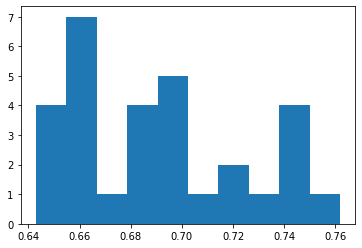

In [59]:
plt.hist(acc_list)

In [60]:
np.mean(acc_list),np.std(acc_list)

(0.6904761904761904, 0.032851135611164844)

In [61]:
# # cm_lt
cm_list_fullmri_RNN_1d=[]
# cm_list_fullmri_RNN_1d_pre=[]
for  i in range(len(cm_list)):
    cm_list_fullmri_RNN_1d.append(cm_list[i].reshape(1,4)[0])
#     cm_list_fullmri_RNN_1d_pre.append(cm_list_pre[i].reshape(1,4)[0])

In [62]:
df_CNvsMCI_mri_all_absvol_RID_separate_random_forest = pd.concat([pd.DataFrame(rdseed_list,columns=['rdseed_list']),pd.DataFrame(cm_list_fullmri_RNN_1d),pd.DataFrame(acc_list,columns=['acc_list']),pd.DataFrame(feature_imp_list)],axis=1)

In [63]:
# df_CNvsMCI_mri_all_absvol_RID_separate_random_forest.to_csv('df_CNvsMCI_mri_all_absvol_RID_separate_random_forest_edu.csv',index=False)

In [64]:
df_CNvsMCI_mri_all_absvol_RID_separate_random_forest.mean()

rdseed_list                      5080.600000
0                                  88.766667
1                                  37.233333
2                                  40.766667
3                                  85.233333
acc_list                            0.690476
GDTOTAL_norm                        0.081877
age_norm                            0.060423
LeftHippocampus                     0.057155
RightHippocampus                    0.047319
RightIsthmusCingulate               0.036143
RightEntorhinal                     0.032086
RightParacentral                    0.033648
Ventricles                          0.037577
RightLingual                        0.030939
ICV                                 0.035882
LeftEntorhinal                      0.032792
RightMiddleTemporal                 0.026351
RightAmygdala                       0.029337
RightInferiorTemporal               0.025315
LeftMiddleTemporal                  0.026168
RightMedialOrbitofrontal            0.029374
RightPutam

In [65]:
pd.DataFrame(feature_imp_list).mean().sort_values(ascending=False)

GDTOTAL_norm                     0.081877
age_norm                         0.060423
LeftHippocampus                  0.057155
RightHippocampus                 0.047319
Ventricles                       0.037577
RightIsthmusCingulate            0.036143
ICV                              0.035882
RightParacentral                 0.033648
LeftEntorhinal                   0.032792
RightEntorhinal                  0.032086
RightLingual                     0.030939
WholeBrain                       0.029696
RightParahippocampal             0.029573
RightMedialOrbitofrontal         0.029374
RightAmygdala                    0.029337
RightCaudalMiddleFrontal         0.028031
RightPrecuneus                   0.027999
RightRostralAnteriorCingulate    0.026705
RightMiddleTemporal              0.026351
LeftMiddleTemporal               0.026168
RightPutamen                     0.026089
RightBankssts                    0.025901
RightInferiorTemporal            0.025315
RightInferiorParietal            0

In [66]:
# len(feature_imp_list)

In [80]:
data_cn['RightMedialOrbitofrontal'].mean(),data_mci['RightMedialOrbitofrontal'].mean()

(4258.792011019284, 4434.15510835995)

In [82]:
data_cn['RightMedialOrbitofrontal'].describe()

count     726.000000
mean     4258.792011
std       691.071689
min      2438.000000
25%      3783.500000
50%      4225.500000
75%      4702.000000
max      6803.000000
Name: RightMedialOrbitofrontal, dtype: float64

In [81]:
data_mci['RightMedialOrbitofrontal'].describe()

count     921.000000
mean     4434.155108
std       698.310422
min      2342.000000
25%      3963.000000
50%      4453.000000
75%      4901.000000
max      7963.000000
Name: RightMedialOrbitofrontal, dtype: float64